# KNN
KNN- it oprates on the principle that similar data points exists close to each pther in a multi-dimensional space. The "K" in KNN refers to the number of nearest neighhors consitered when making predictions.

In [27]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [22]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [33]:
df["flower_name"]=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


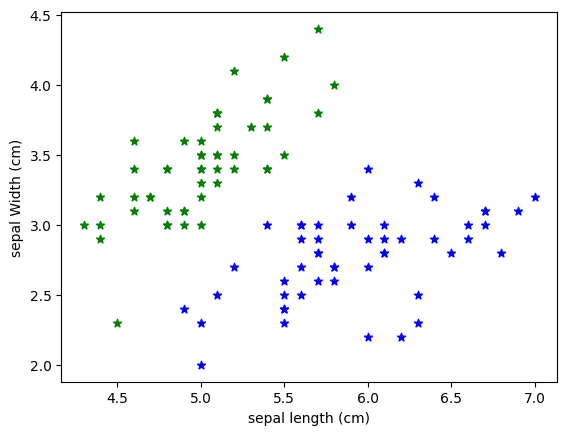

In [34]:
from matplotlib import pyplot as plt
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal Width (cm)")
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="green",marker='*')
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker='*')

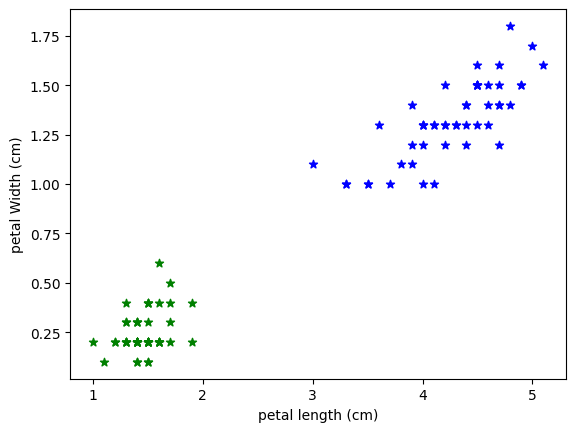

In [35]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal Width (cm)")
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="green",marker='*')
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue",marker='*')

In [36]:
X=df.drop(['flower_name','target'],axis='columns')
y=df.target

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
# model.score(X_train,y_train)
model.score(X_test,y_test)

0.9333333333333333

In [40]:
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[11,  0,  0],
       [ 0, 10,  2],
       [ 0,  0,  7]])

Text(8.222222222222223, 0.5, 'Truth')

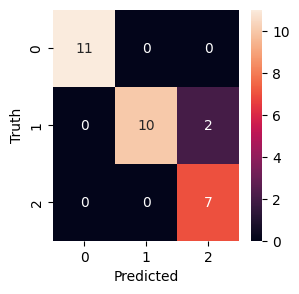

In [43]:
import seaborn as sn
plt.figure(figsize=(3,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# K-Clustering
K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.

Unsupervised Machine Learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.

In [ ]:
import pandas as pd
path="/content/Income.csv"
df=pd.read_csv(path)
df.head()

,Name,Age,Income(S)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


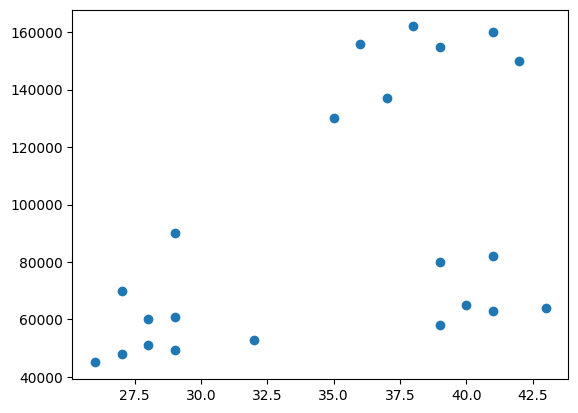

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(df['Age'], df['Income(S)'])
# plt.scatter(df.Age, df.Name)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income(S)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income(S),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


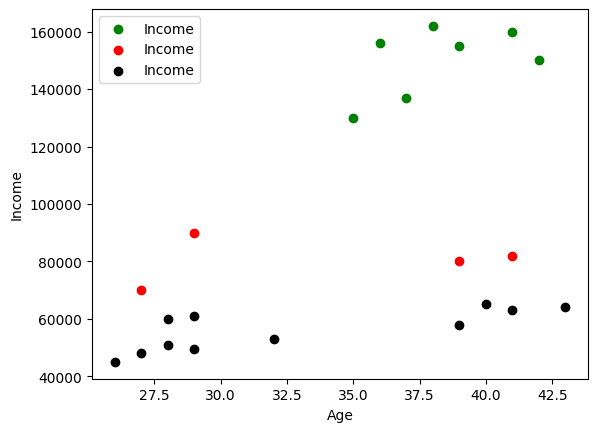

In [ ]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['Age'], df0['Income(S)'],color='green',label='Income')
plt.scatter(df1['Age'], df1['Income(S)'],color='red',label='Income')
plt.scatter(df2['Age'], df2['Income(S)'],color='black',label='Income')
plt.xlabel("Age")
plt.ylabel('Income')
plt.legend()

In [ ]:
scaler=MinMaxScaler().fit(df[['Income(S)']])
df['Income(S)']=scaler.transform(df[['Income(S)']])
scaler=MinMaxScaler().fit(df[['Age']])
df.Age=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income(S),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income(S)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted

In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

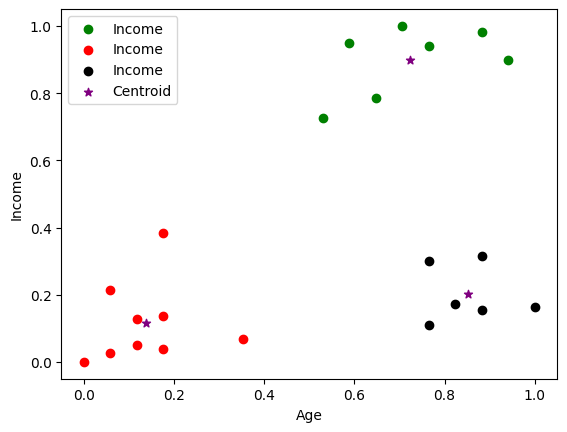

In [ ]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['Age'], df0['Income(S)'],color='green',label='Income')
plt.scatter(df1['Age'], df1['Income(S)'],color='red',label='Income')
plt.scatter(df2['Age'], df2['Income(S)'],color='black',label='Income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',label='Centroid',marker='*')
plt.xlabel("Age")
plt.ylabel('Income')
plt.legend()

In [ ]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k).fit(df[['Age']],df[['Income(S)']])
    sse.append(km.inertia_)
sse

[2.530355457691098,
 0.31408038328453564,
 0.1556228373702422,
 0.13137254901960782,
 0.05562283737024224,
 0.0346020761245675,
 0.02029988465974621,
 0.014244521337946944,
 0.010957324106112973]

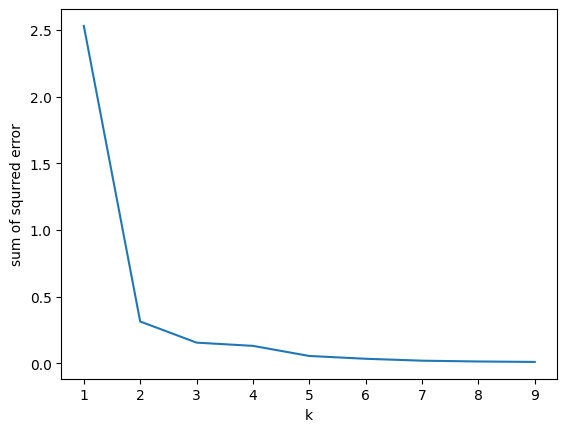

In [ ]:
plt.xlabel('k')
plt.ylabel('sum of squrred error')
plt.plot(k_rng,sse)